# **Diagnostic Analysis**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# https://drive.google.com/file/d/1xyEdZJpQw5AK4lWbUbC6mD8Wnfxco1FG/view?usp=sharing
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1xyEdZJpQw5AK4lWbUbC6mD8Wnfxco1FG")
df

,id,codigo_curriculo,codigo_ingresso,periodo_ingresso,forma_ingresso,codigo_evasao,forma_evasao,periodo_evasao,evadiu_periodo,forma_saida,...,codigo_tipo_matricula,tipo_matricula,codigo_situacao,situacao,media_final,nome_disciplina,numero_creditos,carga_horaria,nome_setor,periodo_relativo
0,Q386391,1990,1,1979.2,VESTIBULAR,4,CANCELAMENTO POR ABANDONO,1989.1,20.0,Evadido,...,4.0,Dispensa,3.0,Aprovado,NaN,ORGANIZACAO INDUSTRIAL,4.0,60.0,UNID. ACAD. DE ADMINISTRAÇÃO E CONTABILIDADE,5.0
1,A261799,1999,16,2011.1,VESTIBULAR / ENEM,1,GRADUADO,2016.1,11.0,Graduado,...,1.0,Normal,3.0,Aprovado,7.5,ESTÁGIO INTEGRADO,10.0,300.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,9.0
2,K266013,2017,18,2017.2,SISU,0,REGULAR,0.0,NaN,Regular,...,4.0,Dispensa,3.0,Aprovado,6.1,LINGUA PORTUGUESA,4.0,60.0,UNID. ACAD. DE LETRAS,2.0
3,H046905,1999,16,2014.1,VESTIBULAR / ENEM,21,CANCELADO REPROVOU TODAS POR FALTAS,2016.2,6.0,Evadido,...,1.0,Normal,3.0,Aprovado,5.0,CALCULO DIFERENCIAL E INTEGRAL I,4.0,60.0,UNID. ACAD. DE MATEMÁTICA,2.0
4,T079917,1990,1,1996.1,VESTIBULAR,1,GRADUADO,1999.2,8.0,Graduado,...,1.0,Normal,3.0,Aprovado,5.6,FÍSICA GERAL III,6.0,90.0,UNID. ACAD. DE FÍSICA,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30125,E191041,1999,16,2013.1,VESTIBULAR / ENEM,1,GRADUADO,2016.1,7.0,Graduado,...,1.0,Normal,4.0,Reprovado,2.4,METODOS ESTATISTICOS,4.0,60.0,UNID. ACAD. DE ESTATÍSTICA,3.0
30126,F026548,1999,18,2014.2,SISU,22,CANCELADO 3 REPROV MESMA DISCIPLINA,2016.1,4.0,Evadido,...,1.0,Normal,4.0,Reprovado,3.8,LABORATÓRIO DE PROGRAMAÇÃO I,4.0,60.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,1.0
30127,P065307,1999,1,2008.2,VESTIBULAR,1,GRADUADO,2014.1,12.0,Graduado,...,1.0,Normal,3.0,Aprovado,9.8,DIREITO E CIDADANIA,4.0,60.0,UNID. ACAD. DE SOCIOLOGIA E ANTROPOLOGIA,6.0
30128,R083868,2017,18,2017.2,SISU,0,REGULAR,0.0,NaN,Regular,...,4.0,Dispensa,3.0,Aprovado,NaN,METODOLOGIA CIENTÍFICA,4.0,60.0,UNID. ACAD. DE SOCIOLOGIA E ANTROPOLOGIA,1.0


## Preprocessing

In [ ]:
# Aplicar os filtros conforme solicitado

# Filtrar periodo_ingresso
filtered_data = df[(df['periodo_ingresso'] >= 2006.1) & (df['periodo_ingresso'] <= 2019.2)]

# Remover tipo_matricula "Dispensa"
filtered_data = filtered_data[filtered_data['tipo_matricula'] != 'Dispensa']

# Remover situacao "Em Curso"
df_filtrado = filtered_data[filtered_data['situacao'] != 'Em Curso']

# Verificar o resultado
df_filtrado.head()

,id,codigo_curriculo,codigo_ingresso,periodo_ingresso,forma_ingresso,codigo_evasao,forma_evasao,periodo_evasao,evadiu_periodo,forma_saida,...,codigo_tipo_matricula,tipo_matricula,codigo_situacao,situacao,media_final,nome_disciplina,numero_creditos,carga_horaria,nome_setor,periodo_relativo
1,A261799,1999,16,2011.1,VESTIBULAR / ENEM,1,GRADUADO,2016.1,11.0,Graduado,...,1.0,Normal,3.0,Aprovado,7.5,ESTÁGIO INTEGRADO,10.0,300.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,9.0
3,H046905,1999,16,2014.1,VESTIBULAR / ENEM,21,CANCELADO REPROVOU TODAS POR FALTAS,2016.2,6.0,Evadido,...,1.0,Normal,3.0,Aprovado,5.0,CALCULO DIFERENCIAL E INTEGRAL I,4.0,60.0,UNID. ACAD. DE MATEMÁTICA,2.0
9,X175376,1999,16,2011.2,VESTIBULAR / ENEM,8,CANCELAMENTO P/ SOLICITACAO ALUNO,2013.2,5.0,Evadido,...,1.0,Normal,5.0,Reprovado por Falta,NaN,MATEMÁTICA DISCRETA,4.0,60.0,UNID. ACAD. DE MATEMÁTICA,2.0
12,C332956,1999,1,2009.2,VESTIBULAR,1,GRADUADO,2013.2,9.0,Graduado,...,1.0,Normal,3.0,Aprovado,8.3,ORG.E ARQUITETURA DE COMPUTADORES I,4.0,60.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,4.0
18,Q283427,1999,1,2010.2,VESTIBULAR,12,CANCELADO NOVO INGRESSO MESMO CURSO,2012.1,4.0,Reingresso,...,1.0,Normal,4.0,Reprovado,1.7,CALCULO DIFERENCIAL E INTEGRAL II,4.0,60.0,UNID. ACAD. DE MATEMÁTICA,3.0


## Basic

### 1. What is the pass rate by course?

In [ ]:
# Contar o número de aprovações e o total de registros por disciplina
aprovações_por_disciplina = df_filtrado[df_filtrado['situacao'] == 'Aprovado'].groupby('nome_disciplina').size()
total_por_disciplina = df_filtrado.groupby('nome_disciplina').size()

# Calcular a taxa de aprovação
taxa_aprovacao_disciplina = (aprovações_por_disciplina / total_por_disciplina * 100).sort_values(ascending=False)

# Exibir as taxas de aprovação por disciplina
taxa_aprovacao_disciplina

nome_disciplina
ADM.DE SIST.GERENC.DE BANCO DE DADOS        100.0
TECC(CIENCIA DE DADOS DESCRITIVA)           100.0
GERENCIA DE REDES                           100.0
INTERCONEXAO DE REDES DE COMPUTADORES       100.0
ADMINISTRACAO DE SISTEMAS                   100.0
                                            ...  
CALCULO DIFERENCIAL E INTEGRAL III            NaN
ENADE/INGRESSANTE                             NaN
FUTSAL - FEM                                  NaN
INT A ENGENHARIA AGRICOLA                     NaN
TECC(M E E DE P DE T EM G M DE D HIST II      NaN
Length: 169, dtype: float64

### 2. How has the frequency of dropout changed over the periods?

In [ ]:
# Visualizar as categorias únicas na coluna 'forma_saida' para entender como a evasão é registrada
df_filtrado['forma_saida'].unique()

array(['Graduado', 'Evadido', 'Reingresso', 'Regular', 'Outros'],
      dtype=object)

In [ ]:
# Filtrar os dados para apenas evasões
evasoes = df_filtrado[df_filtrado['forma_saida'] == 'Evadido']

# Contar o número de evasões por período de ingresso
frequencia_evasao = evasoes['periodo_ingresso'].value_counts().sort_index()

# Converter o índice para string para melhor visualização no gráfico
frequencia_evasao.index = frequencia_evasao.index.map(str)

frequencia_evasao

periodo_ingresso
2006.1     31
2006.2     30
2007.1     45
2007.2     82
2008.1     38
2008.2     63
2009.1    118
2009.2    118
2010.1    153
2010.2    155
2011.1    186
2011.2    259
2012.1    239
2012.2    235
2013.1    233
2013.2    244
2014.1    172
2014.2    165
2015.1    143
2015.2    166
2016.1    132
2016.2    174
2017.1     79
2017.2     95
2018.1     35
2018.2     40
2019.1     12
2019.2      2
Name: count, dtype: int64

### 3. For students who entered through affirmative action, what is the 70th percentile of the age of entry?

In [ ]:
# Filtrar os dados para incluir apenas alunos que entraram por ação afirmativa
acao_afirmativa_df = df_filtrado[df_filtrado['acao_afirmativa'] != 'NÃO']

# Calcular o percentil 70 da idade de ingresso para esses alunos
percentil_70_idade = acao_afirmativa_df['idade_ingresso'].quantile(0.70)
percentil_70_idade

20.0

## Moderate

### 1. Determine if the mode of admission has a significant impact on graduation and dropout rates.

In [ ]:
# Criar categorias de graduação e evasão
graduado_status = ['Graduado']
evasao_status = ['Evadido', 'Cancelamento', 'Reprovou', 'Abandono', 'Reingresso']

# Classificar cada registro como 'Graduado', 'Evadido' ou 'Outros'
df_filtrado['status'] = df_filtrado['forma_saida'].apply(
    lambda x: 'Graduado' if x in graduado_status else ('Evadido' if any(e in x for e in evasao_status) else 'Outros')
)

# Criar uma tabela cruzada
cross_tab = pd.crosstab(df_filtrado['forma_ingresso'], df_filtrado['status'])

# Mostrar a tabela cruzada
cross_tab

<ipython-input-7-1effd0c978b0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['status'] = df_filtrado['forma_saida'].apply(


status,Evadido,Graduado,Outros
forma_ingresso,,,
CONVENIO PEC-G,10,0,0
GRADUADO,5,0,2
JUDICIAL,54,56,15
REINGRESSO,0,5,0
REOPCAO,48,41,79
SISU,1135,914,2975
TRANSFERENCIA,87,114,48
VESTIBULAR,1445,2386,0
VESTIBULAR / ENEM,2049,2241,122


In [ ]:
from scipy.stats import chi2_contingency

# Realizar o teste Qui-quadrado
chi2, p_value, dof, expected = chi2_contingency(cross_tab)

chi2, p_value, dof, expected

(6084.1416872397685,
 0.0,
 16,
 array([[3.49432434e+00, 4.16238884e+00, 2.34328682e+00],
        [2.44602704e+00, 2.91367219e+00, 1.64030077e+00],
        [4.36790543e+01, 5.20298605e+01, 2.92910852e+01],
        [1.74716217e+00, 2.08119442e+00, 1.17164341e+00],
        [5.87046490e+01, 6.99281325e+01, 3.93672186e+01],
        [1.75554855e+03, 2.09118415e+03, 1.17726730e+03],
        [8.70086762e+01, 1.03643482e+02, 5.83478418e+01],
        [1.33867566e+03, 1.59461116e+03, 8.97713181e+02],
        [1.54169590e+03, 1.83644595e+03, 1.03385814e+03]]))

### 2. Consider that the Course Difficulty Index is calculated as the average of the difference between the average grades of the course and the overall average of all courses. What is the difficulty index of the course Differential and Integral Calculus I?

In [ ]:
# Calculando a média geral das notas de todas as disciplinas
media_geral_notas = df_filtrado['media_final'].mean()

# Calculando a média das notas para a disciplina "Cálculo Diferencial e Integral I"
media_calculo = df_filtrado[df_filtrado['nome_disciplina'] == 'CALCULO DIFERENCIAL E INTEGRAL I']['media_final'].mean()

# Índice de Dificuldade da disciplina
indice_dificuldade_calculo = media_calculo - media_geral_notas

media_geral_notas, media_calculo, indice_dificuldade_calculo

(6.679963878632203, 4.095201535508637, -2.5847623431235665)

### 3. How consistent are student grades over time?

In [ ]:
# Agrupar dados por aluno e calcular estatísticas das notas
nota_stats = df_filtrado.groupby('id')['media_final'].agg(['mean', 'std', 'count'])

# Filtrar para alunos com mais de uma nota registrada para evitar divisão por zero no cálculo de desvio padrão
nota_stats_filtrado = nota_stats[nota_stats['count'] > 1]

# Calculando o coeficiente de variação (desvio padrão dividido pela média)
nota_stats_filtrado['cv'] = nota_stats_filtrado['std'] / nota_stats_filtrado['mean']

nota_stats_filtrado.head(), nota_stats_filtrado.describe()

<ipython-input-10-a2cad231ee04>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nota_stats_filtrado['cv'] = nota_stats_filtrado['std'] / nota_stats_filtrado['mean']


(          mean       std  count        cv
 id                                       
 A010012  7.225  1.905037      4  0.263673
 A031430  7.275  1.314978      4  0.180753
 A032232  7.000  2.959730      3  0.422819
 A036974  8.200  1.271045     10  0.155005
 A049471  5.750  1.060660      2  0.184463,
               mean          std        count           cv
 count  1876.000000  1876.000000  1876.000000  1864.000000
 mean      6.338575     1.832214     6.484542     0.363294
 std       1.905235     1.046677     3.891636     0.316561
 min       0.000000     0.000000     2.000000     0.000000
 25%       5.255357     1.032305     3.000000     0.137153
 50%       6.680000     1.672868     6.000000     0.269223
 75%       7.766667     2.512008     9.000000     0.493141
 max       9.875000     6.717514    22.000000     2.236068)

## Challenging

### 1. Does the type of admission statistically significant influence the number of semesters until graduation?

In [ ]:
# Verificando a distribuição dos valores na coluna 'forma_ingresso'
ingresso_distribuicao = df_filtrado['forma_ingresso'].value_counts()

# Verificando a disponibilidade de dados para 'periodo_relativo'
periodo_relativo_disponibilidade = df_filtrado['periodo_relativo'].isna().sum()

ingresso_distribuicao, periodo_relativo_disponibilidade

(forma_ingresso
 SISU                 5024
 VESTIBULAR / ENEM    4412
 VESTIBULAR           3831
 TRANSFERENCIA         249
 REOPCAO               168
 JUDICIAL              125
 CONVENIO PEC-G         10
 GRADUADO                7
 REINGRESSO              5
 Name: count, dtype: int64,
 16)

In [ ]:
# Removendo linhas onde 'periodo_relativo' é nulo
df_filtrado_clean = df_filtrado.dropna(subset=['periodo_relativo'])

# Realizando o Teste ANOVA
from scipy.stats import f_oneway

# Agrupando os dados por 'forma_ingresso' e coletando 'periodo_relativo'
groups = df_filtrado_clean.groupby('forma_ingresso')['periodo_relativo'].apply(list)

# Preparando os argumentos para o teste ANOVA
anova_args = [group for group in groups]

# Realizando o teste ANOVA
anova_result = f_oneway(*anova_args)
anova_result

F_onewayResult(statistic=42.44707029569765, pvalue=1.101827625561853e-67)

### 2. Is there a statistically significant difference in grades between students enrolled in Normal and Extracurricular modes?

In [ ]:
from scipy.stats import shapiro, levene

# Filtrar dados apenas para os tipos de matrícula "Normal" e "Extra Curricular"
normal_scores = df_filtrado[df_filtrado['tipo_matricula'] == 'Normal']['media_final'].dropna()
extra_curricular_scores = df_filtrado[df_filtrado['tipo_matricula'] == 'Extra Curricular']['media_final'].dropna()

# Teste de Shapiro-Wilk para normalidade
normality_normal = shapiro(normal_scores)
normality_extra_curricular = shapiro(extra_curricular_scores)

# Teste de Levene para homogeneidade das variâncias
levene_test = levene(normal_scores, extra_curricular_scores)

normality_normal, normality_extra_curricular, levene_test

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(ShapiroResult(statistic=0.9009798169136047, pvalue=0.0),
 ShapiroResult(statistic=0.8952053189277649, pvalue=4.7174951827603986e-23),
 LeveneResult(statistic=29.532250852751492, pvalue=5.603038608648444e-08))

In [ ]:
from scipy.stats import mannwhitneyu

# Teste de Mann-Whitney
mann_whitney_result = mannwhitneyu(normal_scores, extra_curricular_scores, alternative='two-sided')
mann_whitney_result

MannwhitneyuResult(statistic=4203115.5, pvalue=2.8049831073992787e-07)

### 3.  Consider that the overall average of a student is defined as the average of all nonnull grades in the courses the student has taken. Does affirmative action, the mode of admission, and the student’s gender have any significant influence on their overall average?

<ipython-input-15-9a3872d207fc>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-15-9a3872d207fc>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


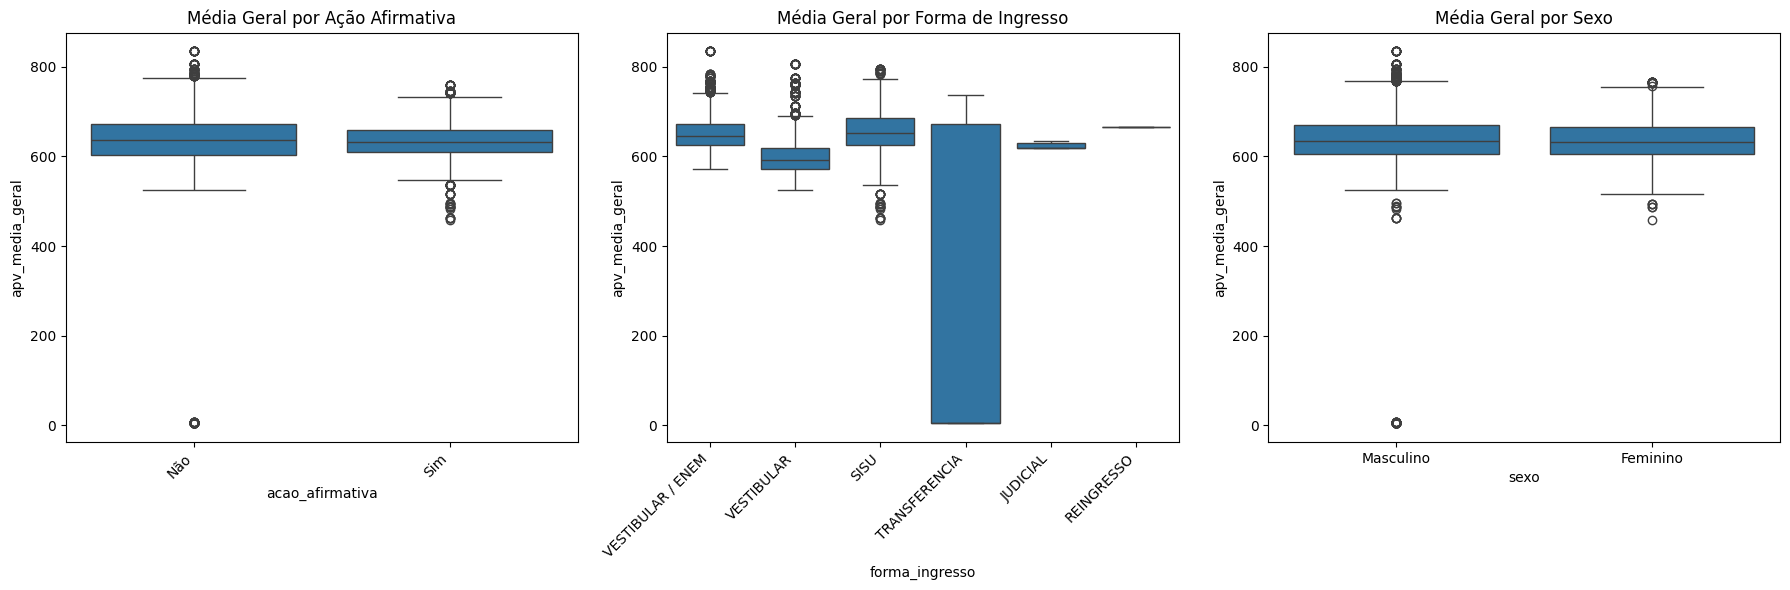

(KruskalResult(statistic=11.825816794621714, pvalue=0.0005841508375434598),
 F_onewayResult(statistic=1546.278752466031, pvalue=0.0),
 KruskalResult(statistic=1.819598549788305, pvalue=0.17736106989815872))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

# Removendo registros onde a média geral é nula para as análises
df_analise = df_filtrado.dropna(subset=['apv_media_geral'])

# Gráficos de Boxplot para Ação Afirmativa, Forma de Ingresso e Sexo
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Ação Afirmativa
sns.boxplot(ax=axes[0], x='acao_afirmativa', y='apv_media_geral', data=df_analise)
axes[0].set_title('Média Geral por Ação Afirmativa')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Forma de Ingresso
sns.boxplot(ax=axes[1], x='forma_ingresso', y='apv_media_geral', data=df_analise)
axes[1].set_title('Média Geral por Forma de Ingresso')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Sexo
sns.boxplot(ax=axes[2], x='sexo', y='apv_media_geral', data=df_analise)
axes[2].set_title('Média Geral por Sexo')

plt.tight_layout()
plt.show()

# Preparando dados para os testes estatísticos
# Agrupando dados por categoria
group_aa = df_analise.groupby('acao_afirmativa')['apv_media_geral'].apply(list)
group_fi = df_analise.groupby('forma_ingresso')['apv_media_geral'].apply(list)
group_sex = df_analise.groupby('sexo')['apv_media_geral'].apply(list)

# Verificando se as variáveis têm mais de duas categorias para escolher o teste estatístico adequado
anova_aa = f_oneway(*group_aa) if len(group_aa) > 2 else kruskal(*group_aa)
anova_fi = f_oneway(*group_fi) if len(group_fi) > 2 else kruskal(*group_fi)
anova_sex = f_oneway(*group_sex) if len(group_sex) > 2 else kruskal(*group_sex)

anova_aa, anova_fi, anova_sex